In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from user_hub.user import User
from user_hub import time_box

In [176]:
redditor = User("spez")
redditor.validate_user()
redditor.get_visited_pages()
visited, t_stamp, t_stamp_subreddit = redditor.return_user_attributes()
edges = time_box.process_to_edges(t_stamp_subreddit)

announcements
blog
RoastMe
IAmA
me_irl
AskReddit
thanosdidnothingwrong
mildlyinfuriating


In [177]:
nodes = list(visited.keys()) + list(t_stamp.keys())
G = nx.Graph()
G.add_nodes_from(nodes)
clean_edge = []
for pair in edges:
    if pair not in clean_edge:
        clean_edge.append(pair)
        
G.add_edges_from(clean_edge)

In [178]:
labels = {}
for i in range(len(nodes)):
    labels[i] = nodes[i]

In [179]:
# plt.figure(figsize=(10,10))
# pos = nx.spring_layout(G)  # positions for all nodes


# nx.draw_networkx_nodes(G, pos,
#                        nodelist=[node for node in nodes if type(node) is int],
#                        node_color='r',
#                        node_size=400,
#                        alpha=0.5)

# nx.draw_networkx_nodes(G, pos,
#                        nodelist=[node for node in nodes if type(node) is not int],
#                        node_color='b',
#                        node_size=300,
#                        alpha=0.5)

# nx.draw_networkx_edges(G, pos,
#                        edgelist=clean_edge,
#                        width=1, alpha=0.5, edge_color='k')

# nx.draw_networkx_labels(G, pos, labels)
# # nx.draw(G, with_labels=True, node_size=300)

In [180]:
visited

{'announcements': 77,
 'blog': 2,
 'RoastMe': 1,
 'IAmA': 16,
 'me_irl': 1,
 'AskReddit': 1,
 'thanosdidnothingwrong': 1,
 'mildlyinfuriating': 1}

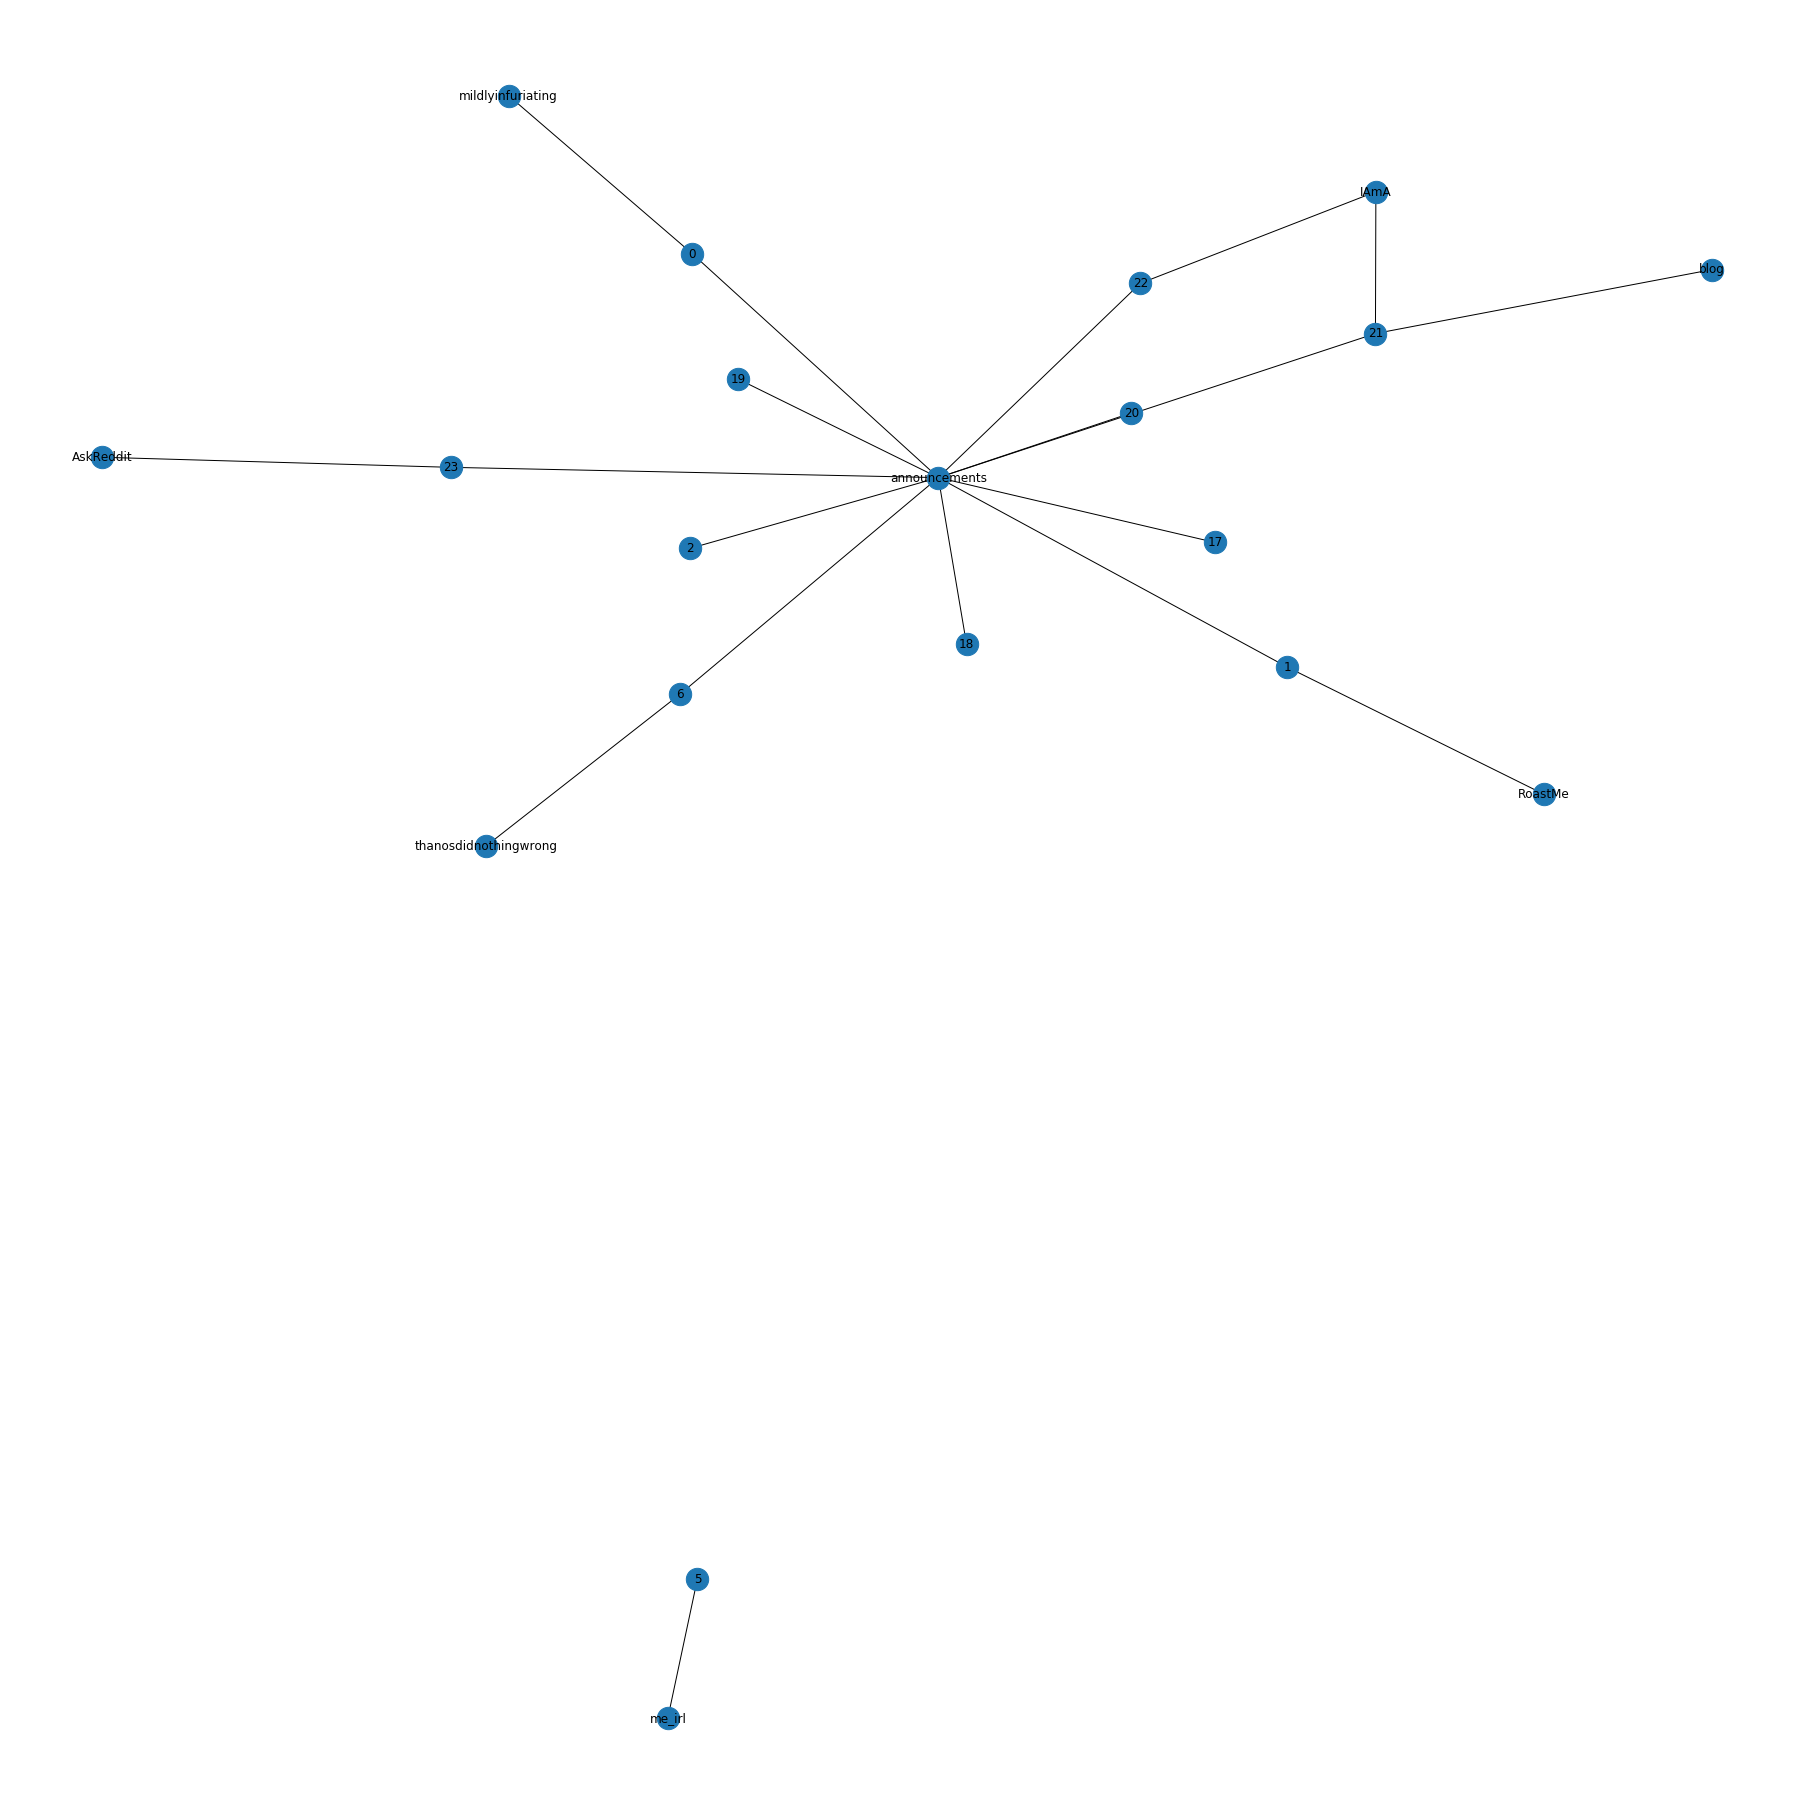

In [181]:
plt.figure(figsize=(25,25))
nx.draw(G, with_labels=True, node_size=500)

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.node[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))